#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from dateutil.relativedelta import relativedelta


from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA


#### Load the data

In [2]:
df = pd.read_csv('data_comexstat.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [5]:
df.describe()

,tons,usd
count,1.179650e+05,1.179650e+05
mean,1.453681e+04,4.813150e+06
std,4.977926e+04,1.949412e+07
min,0.000000e+00,0.000000e+00
25%,1.249000e+02,7.155200e+04
50%,2.000000e+03,7.250000e+05
75%,1.353403e+04,3.895943e+06
max,1.798446e+06,9.039304e+08


In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

df.head()

,date,product,state,country,type,route,tons,usd,year,month
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997,1
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997,1
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,1
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,1
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997,1


In [8]:
df['thousands_tons']=df['tons']/1000

In [9]:
df['millions_usd'] = df['usd']/1000000

In [10]:
df.head()

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997,1,0.044045,0.113029
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997,1,0.054000,0.036720
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,1,0.000200,0.000180
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,1,0.003488,0.005688
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997,1,0.027000,0.018630


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            117965 non-null  datetime64[ns]
 1   product         117965 non-null  object        
 2   state           117965 non-null  object        
 3   country         117965 non-null  object        
 4   type            117965 non-null  object        
 5   route           117965 non-null  object        
 6   tons            117965 non-null  float64       
 7   usd             117965 non-null  float64       
 8   year            117965 non-null  int64         
 9   month           117965 non-null  int64         
 10  thousands_tons  117965 non-null  float64       
 11  millions_usd    117965 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 10.8+ MB


### 1. Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’

In [19]:
def monthly_product_export(product_name):
    
    product_name['product'] = product_name['product'].str.replace('_', ' ')
    
    name = product_name['product'].unique().tolist()[0]

    fig, ax = plt.subplots(figsize=(15, 9))
    palette = sns.color_palette("husl", 5)

    sns.lineplot(product_name['month'], product_name['thousands_tons'], hue=product_name['year'], ci=None, legend='full', palette=palette)

    ax.set_title('Monthly Brazil ' + name +' Exports', fontsize = 22, fontdict=dict(weight='bold'), pad=20)
    ax.set_ylabel('thousands of tons')
    ax.set_xlabel('')
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.tick_params(axis='x', which='major', labelsize=14)
    plt.rcParams["font.family"] = "serif"

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(product_name['month'].unique(), labels = months )
    
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.15),ncol=6, title=None)
    legend.texts[0].set_text('')
    legend.get_frame().set_linewidth(0.0)

    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.axes_style("ticks")
    plt.grid(axis='y')

    plt.show()

In [20]:
soybeans = df.loc[(df['product'] == 'soybeans') & (df['type']=='Export') & (df['year']>=2015)]

In [21]:
soybean_oil = df.loc[(df['product'] == 'soybean_oil') & (df['type']=='Export') & (df['year']>=2015)]

In [22]:
soybean_meal = df.loc[(df['product'] == 'soybean_meal') & (df['type']=='Export') & (df['year']>=2015)]

<ipython-input-19-76a015153aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_name['product'] = product_name['product'].str.replace('_', ' ')


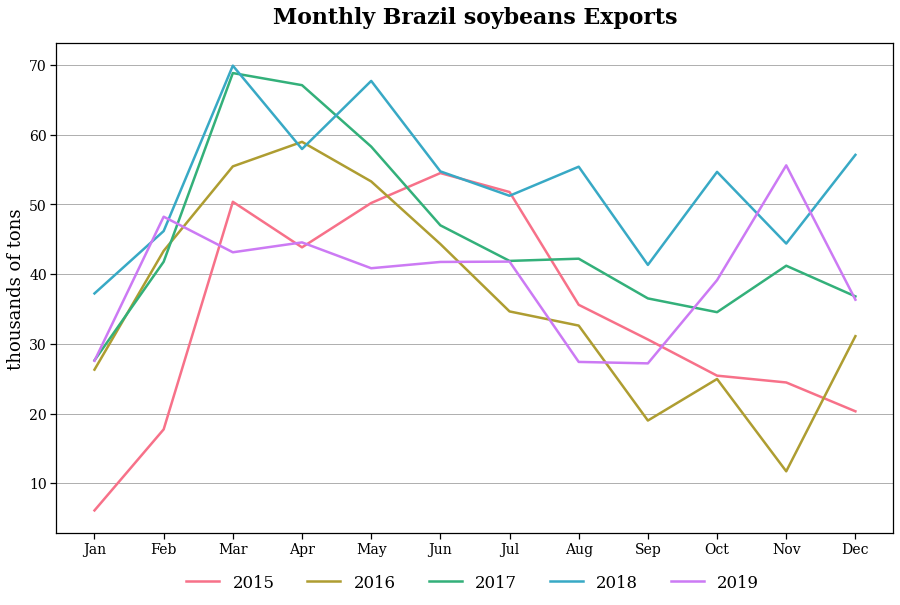

In [23]:
monthly_product_export(soybeans)

<ipython-input-19-76a015153aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_name['product'] = product_name['product'].str.replace('_', ' ')


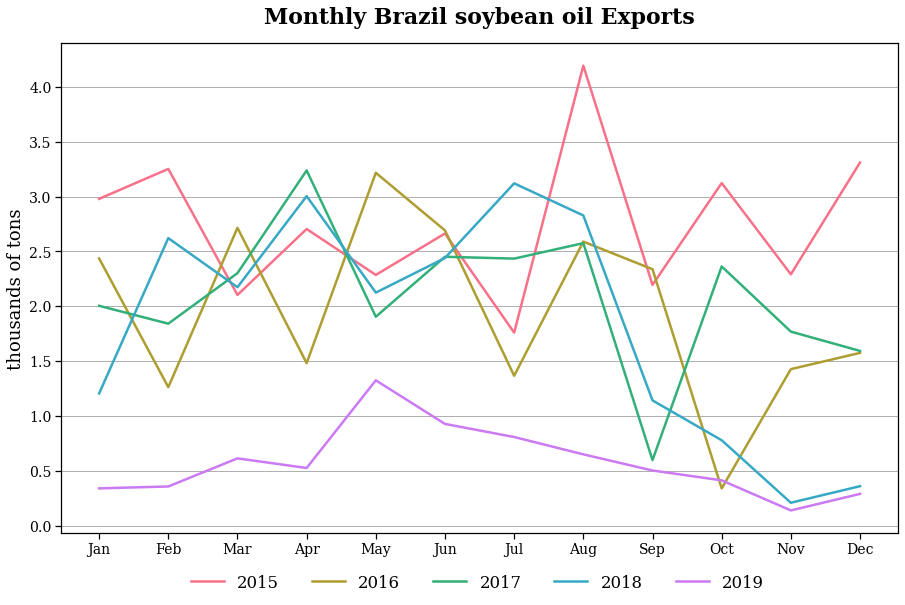

In [24]:
monthly_product_export(soybean_oil)

<ipython-input-19-76a015153aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_name['product'] = product_name['product'].str.replace('_', ' ')


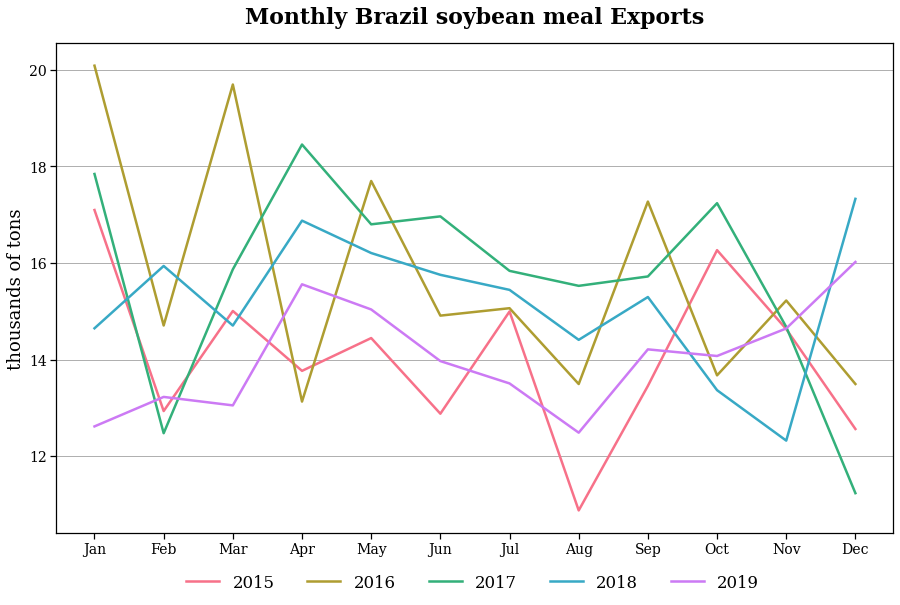

In [25]:
monthly_product_export(soybean_meal)

### 2. What are the 3 most important products exported by Brazil in the last 5 years?

In [26]:
five_yrs_ago = (datetime.now() - relativedelta(years=5)).year
five_yrs_ago

2015

In [27]:
export_five_yrs = df.loc[(df['type'] == 'Export') & (df['year']>=five_yrs_ago)]
export_five_yrs

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
75505,2015-01-01,corn,BA,Morocco,Export,Sea,7486.339,1370000.0,2015,1,7.486339,1.370000
75506,2015-01-01,corn,DF,Taiwan,Export,Sea,6.085,1168.0,2015,1,0.006085,0.001168
75507,2015-01-01,corn,ES,South Korea,Export,Sea,50.000,8135.0,2015,1,0.050000,0.008135
75508,2015-01-01,corn,GO,China,Export,Sea,41331.166,8143579.0,2015,1,41.331166,8.143579
75509,2015-01-01,corn,GO,Costa Rica,Export,Sea,40.000,13140.0,2015,1,0.040000,0.013140
...,...,...,...,...,...,...,...,...,...,...,...,...
117952,2019-12-01,wheat,PR,United States,Export,Sea,0.400,400.0,2019,12,0.000400,0.000400
117957,2019-12-01,wheat,RS,Vietnam,Export,Sea,36698.000,6963002.0,2019,12,36.698000,6.963002
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0,2019,12,0.000500,0.000477
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0,2019,12,0.000025,0.000050


In [28]:
most_important = export_five_yrs.groupby('product')['millions_usd'].sum().sort_values(ascending=False)[:3].reset_index()
most_important

,product,millions_usd
0,soybeans,123325.529857
1,sugar,40938.486021
2,soybean_meal,28407.723437


In [29]:
print('The 3 most important products exported by Brazil in the last 5 years are: ', most_important['product'].unique() )

The 3 most important products exported by Brazil in the last 5 years are:  ['soybeans' 'sugar' 'soybean_meal']


<ipython-input-30-c7ab7a13076b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export_five_yrs_top3['product']=export_five_yrs['product'].str.replace('_', ' ')


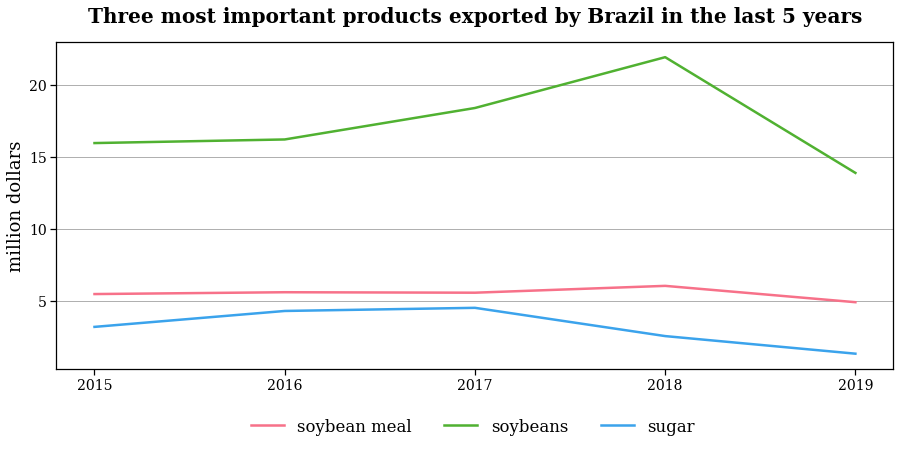

In [30]:
export_five_yrs_top3 = export_five_yrs.loc[((export_five_yrs['product'] == 'soybeans') | (export_five_yrs['product'] == 'sugar') | (export_five_yrs['product'] == 'soybean_meal'))]
export_five_yrs_top3['product']=export_five_yrs['product'].str.replace('_', ' ')

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("husl", 3)
sns.lineplot(export_five_yrs_top3['year'], export_five_yrs_top3['millions_usd'], hue= export_five_yrs_top3['product'],ci=None, palette=palette)

ax.set_title('Three most important products exported by Brazil in the last 5 years', fontsize = 20, fontdict=dict(weight='bold'), pad=20)
ax.set_ylabel('million dollars')
ax.set_xlabel('')

plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xticks(export_five_yrs_top3['year'].unique())
plt.rcParams["font.family"] = "serif"

legend = ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.25), ncol=4, title=None)
legend.texts[0].set_text('')
legend.get_frame().set_linewidth(0.0)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.axes_style("ticks")
plt.grid(axis='y')

plt.show()

### 3. What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

In [31]:
# Products with 5 routes
def product_route(df, product):
    
    product_export = df.loc[(df['product'] == product) & (df['type'] == 'Export') & (df['year']>=2015)]
    product_routes = product_export.groupby('year')['route'].value_counts().unstack().reset_index()
    name = product.replace('_', ' ')
    
    years=product_routes['year'].unique().tolist()

    air = np.array(product_routes['Air'].fillna(0).tolist())
    ground = np.array(product_routes['Ground'].fillna(0).tolist())
    other = np.array(product_routes['Other'].fillna(0).tolist())
    river =np.array(product_routes['River'].fillna(0).tolist())
    sea = np.array(product_routes['Sea'].fillna(0).tolist())

    total = air + ground + other + river + sea
    proportion_air = np.true_divide(air,total)*100
    proportion_ground = np.true_divide(ground,total)*100
    proportion_other = np.true_divide(other,total)*100
    proportion_river = np.true_divide(river,total)*100
    proportion_sea = np.true_divide(sea,total)*100

    colors =  ['#ade8f4','#cb997e',  '#8d99ae', '#0077b6', '#03045e']

    r = range(len(years))

    barWidth = 0.9

    plt.figure(figsize=(10,7))
    ax1 = plt.bar(r, proportion_air, bottom=proportion_ground+proportion_other+proportion_river+proportion_sea, color=colors[0], edgecolor='white', width=barWidth, label="Air")
    ax2 = plt.bar(r, proportion_ground, bottom=proportion_other+proportion_river+proportion_sea, color=colors[1], edgecolor='white', width=barWidth, label='Ground')
    ax3 = plt.bar(r, proportion_other, bottom = proportion_river+proportion_sea, color=colors[2], edgecolor='white', width=barWidth, label='Other')
    ax4 = plt.bar(r, proportion_river, bottom = proportion_sea,color=colors[3], edgecolor='white', width=barWidth, label='River')
    ax5 = plt.bar(r, proportion_sea, color=colors[4], edgecolor='white', width=barWidth, label='Sea')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.10), ncol=5, fancybox=True)
    plt.xticks(r, years, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('%')
    plt.title('Export Routes - ' + name, fontsize = 20, fontdict=dict(weight='bold'),pad=25)
    plt.show()

In [32]:
export = df.loc[(df['type'] == 'Export')]
export.groupby('product')['route'].value_counts()

product       route 
corn          Sea       13448
              Ground     1830
              Air         917
              Other       731
              River       468
soybean_meal  Sea       17238
              Ground      291
              Air          58
              River        48
              Other        37
soybean_oil   Sea       10175
              Ground     2595
              Other      2377
              River        84
              Air          56
soybeans      Sea       19828
              River      1007
              Ground      538
              Air         260
              Other       184
sugar         Sea       27697
              Other      2924
              Ground     2072
              Air         162
              River       133
wheat         Sea         448
              Ground      124
              Other       102
              Air          29
Name: route, dtype: int64

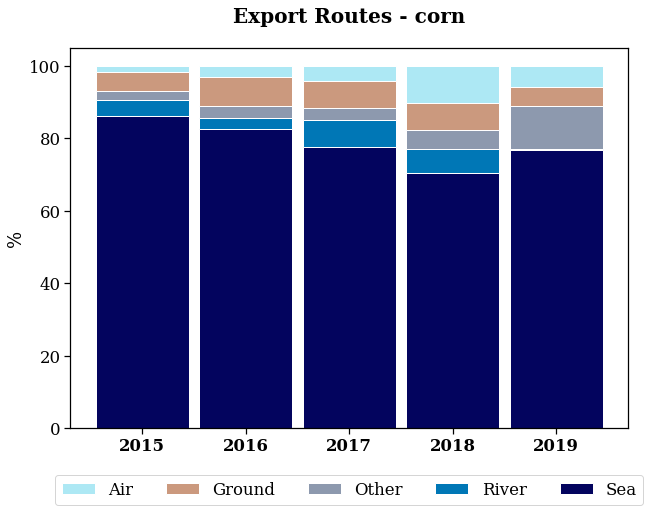

In [33]:
product_route(df, 'corn')

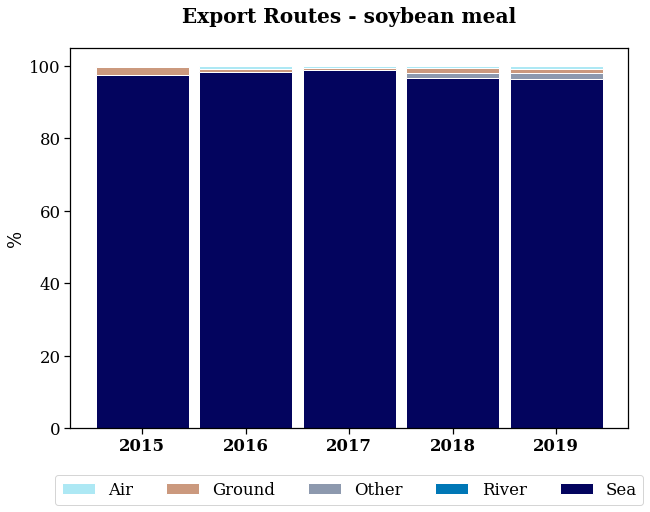

In [34]:
product_route(df, 'soybean_meal')

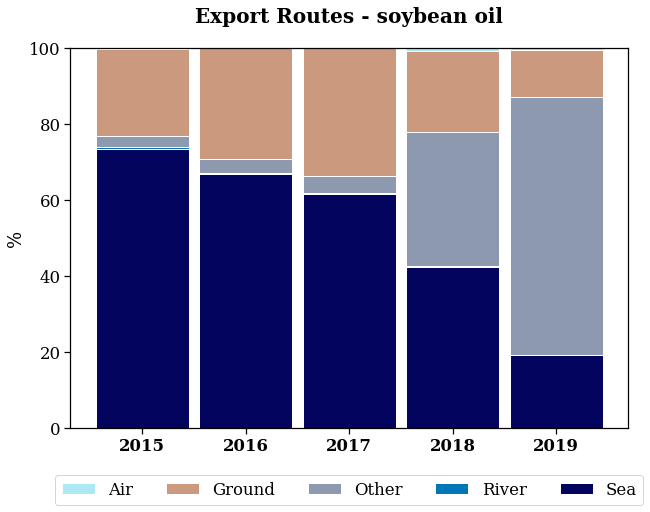

In [35]:
product_route(df, 'soybean_oil')

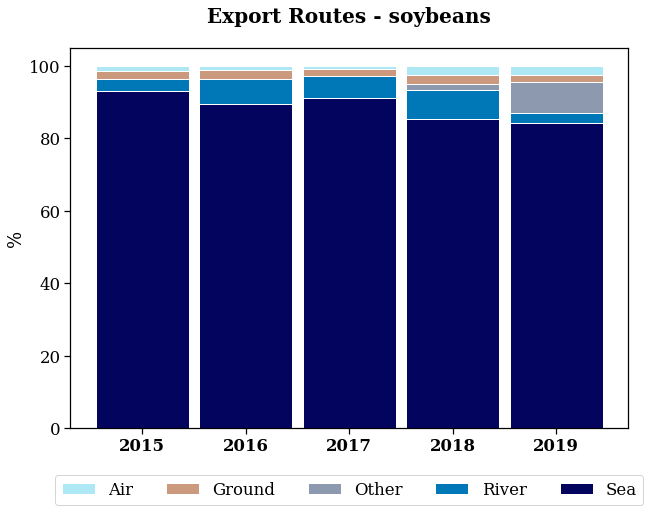

In [36]:
product_route(df, 'soybeans')

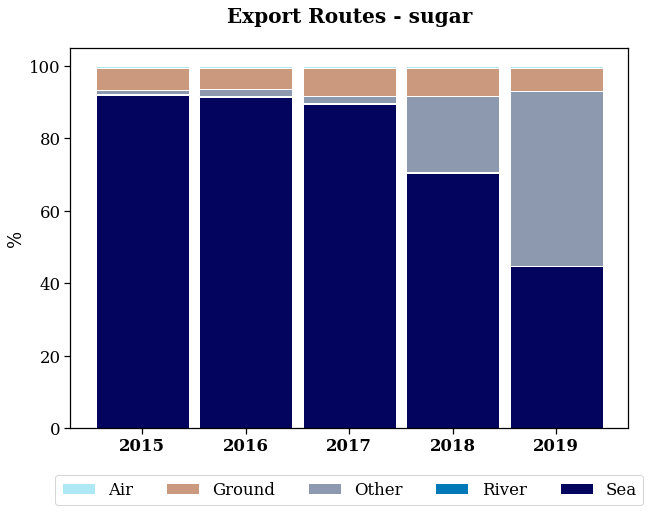

In [37]:
product_route(df, 'sugar')

In [38]:
# Products with 4 routes = Wheat
def product_route2(df, product):
    
    product_export = df.loc[(df['product'] == product) & (df['type'] == 'Export') & (df['year']>=2015)]
    product_routes = product_export.groupby('year')['route'].value_counts().unstack().reset_index()
    name = product.replace('_', ' ')
    
    years=product_routes['year'].unique().tolist()

    air = np.array(product_routes['Air'].fillna(0).tolist())
    ground = np.array(product_routes['Ground'].fillna(0).tolist())
    other = np.array(product_routes['Other'].fillna(0).tolist())
    sea = np.array(product_routes['Sea'].fillna(0).tolist())

    total = air + ground + other  + sea
    proportion_air = np.true_divide(air,total)*100
    proportion_ground = np.true_divide(ground,total)*100
    proportion_other = np.true_divide(other,total)*100
    proportion_sea = np.true_divide(sea,total)*100

    colors =  ['#ade8f4','#cb997e',  '#8d99ae', '#03045e']

    r = range(len(years))

    barWidth = 0.9

    plt.figure(figsize=(10,7))
    ax1 = plt.bar(r, proportion_air, bottom=proportion_ground+proportion_other+proportion_sea, color=colors[0], edgecolor='white', width=barWidth, label="Air")
    ax2 = plt.bar(r, proportion_ground, bottom=proportion_other+proportion_sea, color=colors[1], edgecolor='white', width=barWidth, label='Ground')
    ax3 = plt.bar(r, proportion_other, bottom = proportion_sea, color=colors[2], edgecolor='white', width=barWidth, label='Other')
    ax4 = plt.bar(r, proportion_sea, color=colors[3], edgecolor='white', width=barWidth, label='Sea')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.10), ncol=5, fancybox=True)
    plt.xticks(r, years, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('%')
    plt.title('Export Routes - ' + name, fontsize = 20, fontdict=dict(weight='bold'),pad=25)
    plt.show()

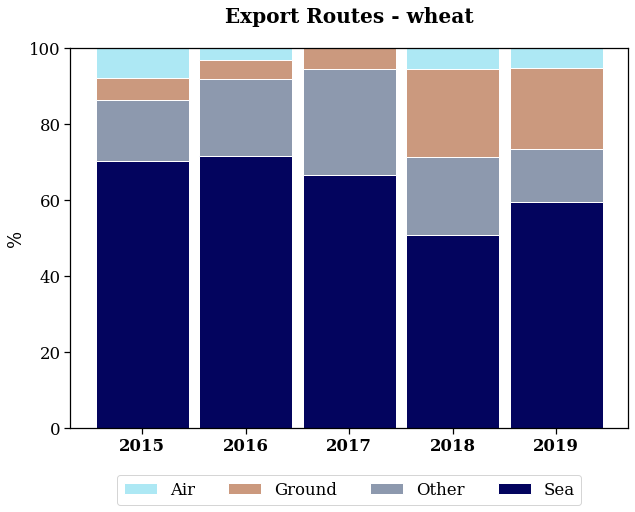

In [39]:
product_route2(df, 'wheat')

### 4. Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

In [40]:
three_yrs_ago = (datetime.now() - relativedelta(years=3)).year
three_yrs_ago

2017

#### Corn

In [41]:
corn_export_three_yrs = df.loc[(df['type'] == 'Export') & (df['product'] == 'corn') & (df['year'] >= three_yrs_ago)]
corn_export_three_yrs

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
90622,2017-01-01,corn,GO,Dominican Republic,Export,Sea,795.679,147710.0,2017,1,0.795679,0.147710
90623,2017-01-01,corn,GO,Ecuador,Export,Air,0.122,1504.0,2017,1,0.000122,0.001504
90624,2017-01-01,corn,GO,Egypt,Export,Sea,199.950,533884.0,2017,1,0.199950,0.533884
90625,2017-01-01,corn,GO,Iran,Export,Sea,17.680,2791.0,2017,1,0.017680,0.002791
90626,2017-01-01,corn,GO,Iran,Export,Sea,600.000,85626.0,2017,1,0.600000,0.085626
...,...,...,...,...,...,...,...,...,...,...,...,...
117265,2019-12-01,corn,SP,Vietnam,Export,Sea,2575.793,402284.0,2019,12,2.575793,0.402284
117266,2019-12-01,corn,TO,Egypt,Export,Sea,27908.815,4433950.0,2019,12,27.908815,4.433950
117267,2019-12-01,corn,TO,Kuwait,Export,Sea,1293.930,229003.0,2019,12,1.293930,0.229003
117268,2019-12-01,corn,TO,Philippines,Export,Air,0.007,27.0,2019,12,0.000007,0.000027


In [42]:
top5_corn = corn_export_three_yrs.groupby('country')['millions_usd'].sum().round(2).sort_values(ascending=False)[:5].reset_index()
top5_corn

,country,millions_usd
0,Iran,2822.34
1,Japan,1574.98
2,Vietnam,1551.04
3,Egypt,1375.07
4,Spain,1335.77


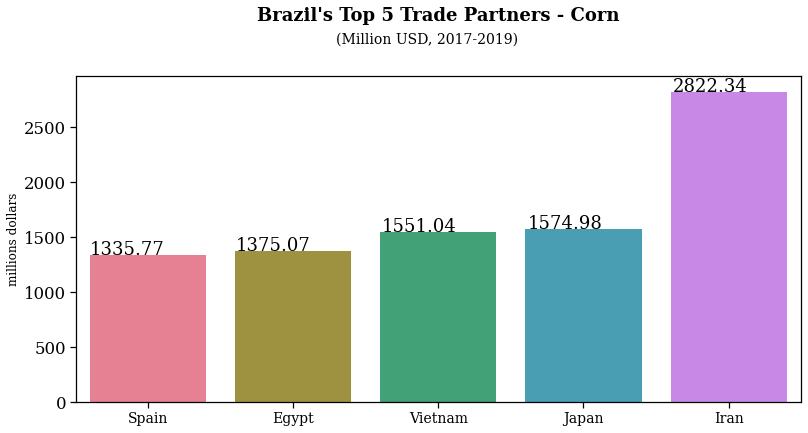

In [43]:
plt.figure(figsize=(13,6))
palette = sns.color_palette("husl", 5)

ax = sns.barplot(x='country', y='millions_usd', data=top5_corn, order=top5_corn.sort_values('millions_usd').country, palette=palette, )
for p in ax.patches:
   ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1))
    
plt.xlabel("", size=1)
plt.xticks(fontsize=14)
plt.ylabel("millions dollars", size=12)
plt.suptitle('(Million USD, 2017-2019)', size=14)
plt.title("Brazil's Top 5 Trade Partners - Corn", size=18, fontdict=dict(weight='bold'), pad=55)

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
sns.axes_style("ticks")

plt.show()

In [44]:
partners_c = top5_corn['country'].unique().tolist()
partners_c

['Iran', 'Japan', 'Vietnam', 'Egypt', 'Spain']

In [45]:
top_partners_corn = corn_export_three_yrs.loc[corn_export_three_yrs['country'].isin(partners_c)]
top_partners_corn

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
90624,2017-01-01,corn,GO,Egypt,Export,Sea,199.950,533884.0,2017,1,0.199950,0.533884
90625,2017-01-01,corn,GO,Iran,Export,Sea,17.680,2791.0,2017,1,0.017680,0.002791
90626,2017-01-01,corn,GO,Iran,Export,Sea,600.000,85626.0,2017,1,0.600000,0.085626
90627,2017-01-01,corn,GO,Iran,Export,Sea,35203.340,6608482.0,2017,1,35.203340,6.608482
90636,2017-01-01,corn,GO,Vietnam,Export,Sea,4341.004,733062.0,2017,1,4.341004,0.733062
...,...,...,...,...,...,...,...,...,...,...,...,...
117257,2019-12-01,corn,SP,Japan,Export,Sea,9948.909,1793319.0,2019,12,9.948909,1.793319
117258,2019-12-01,corn,SP,Japan,Export,Sea,39694.767,6606463.0,2019,12,39.694767,6.606463
117265,2019-12-01,corn,SP,Vietnam,Export,Sea,2575.793,402284.0,2019,12,2.575793,0.402284
117266,2019-12-01,corn,TO,Egypt,Export,Sea,27908.815,4433950.0,2019,12,27.908815,4.433950


In [46]:
top_partners_corn5 = top_partners_corn.pivot_table(index = 'country',
                            columns = 'year',
                            values = 'millions_usd',
                            aggfunc=np.sum).reset_index()
top_partners_corn5['total_million_usd'] = top_partners_corn5.sum(axis=1)
top_partners_corn5.sort_values(by = ['total_million_usd'], ascending=False)

year,country,2017,2018,2019,total_million_usd
1,Iran,782.609155,1096.062061,943.665065,2822.336281
2,Japan,451.950806,40.674571,1082.350215,1574.975592
4,Vietnam,412.219158,490.681604,648.134446,1551.035208
0,Egypt,500.375313,331.566446,543.123377,1375.065136
3,Spain,436.927252,377.941617,520.900738,1335.769607


In [47]:
top_partners_corn5['total_usd'] = top_partners_corn5.sum(axis=1)
top_partners_corn5.sort_values(by = ['total_usd'], ascending=False)

year,country,2017,2018,2019,total_million_usd,total_usd
1,Iran,782.609155,1096.062061,943.665065,2822.336281,5644.672562
2,Japan,451.950806,40.674571,1082.350215,1574.975592,3149.951184
4,Vietnam,412.219158,490.681604,648.134446,1551.035208,3102.070416
0,Egypt,500.375313,331.566446,543.123377,1375.065136,2750.130272
3,Spain,436.927252,377.941617,520.900738,1335.769607,2671.539214


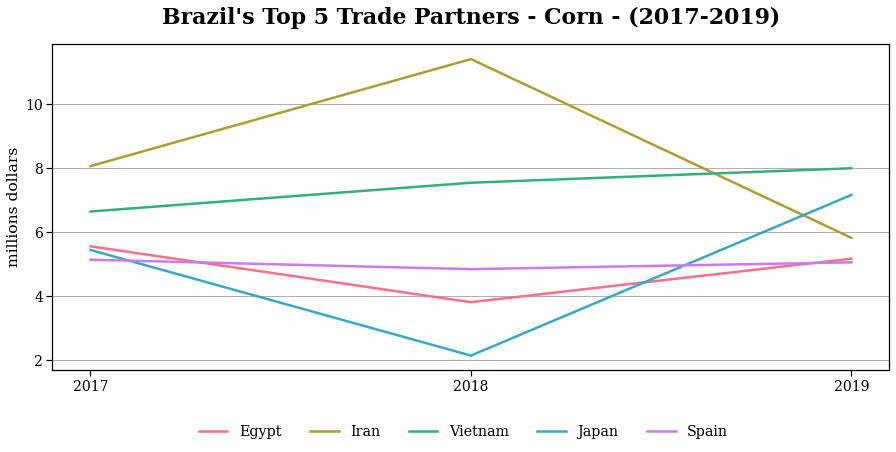

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("husl", 5)
sns.lineplot(top_partners_corn['year'], top_partners_corn['millions_usd'], hue= top_partners_corn['country'],ci=None, palette=palette)

ax.set_title("Brazil's Top 5 Trade Partners - Corn - (2017-2019)", fontsize = 22, fontdict=dict(weight='bold'), pad=20)
ax.set_ylabel('millions dollars')
ax.set_xlabel('')

plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xticks(top_partners_corn['year'].unique())

plt.rcParams["font.family"] = "serif"

legend = ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.25), ncol=6, title=None)
legend.texts[0].set_text('')
legend.get_frame().set_linewidth(0.0)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.axes_style("ticks")
plt.grid(axis='y')

plt.show()

#### Sugar

In [49]:
sugar_export_three_yrs = df.loc[(df['type'] == 'Export') & (df['product'] == 'sugar') & (df['year'] >= three_yrs_ago)]
sugar_export_three_yrs

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
90867,2017-01-01,sugar,AL,Canada,Export,Sea,62000.000,22821294.0,2017,1,62.000000,22.821294
90868,2017-01-01,sugar,AL,Ghana,Export,Sea,4050.000,2076639.0,2017,1,4.050000,2.076639
90869,2017-01-01,sugar,AL,Guinea,Export,Sea,270.000,147555.0,2017,1,0.270000,0.147555
90870,2017-01-01,sugar,AL,Liberia,Export,Sea,270.000,147555.0,2017,1,0.270000,0.147555
90871,2017-01-01,sugar,AL,Togo,Export,Sea,324.000,177066.0,2017,1,0.324000,0.177066
...,...,...,...,...,...,...,...,...,...,...,...,...
117919,2019-12-01,sugar,SP,Uruguay,Export,Ground,1890.000,577618.0,2019,12,1.890000,0.577618
117920,2019-12-01,sugar,SP,Venezuela,Export,Ground,80.000,55491.0,2019,12,0.080000,0.055491
117921,2019-12-01,sugar,SP,Venezuela,Export,Sea,8967.646,3828624.0,2019,12,8.967646,3.828624
117922,2019-12-01,sugar,SP,Yemen,Export,Sea,5805.000,1726058.0,2019,12,5.805000,1.726058


In [50]:
top5_sugar = sugar_export_three_yrs.groupby('country')['millions_usd'].sum().round(2).sort_values(ascending=False)[:5].reset_index()
top5_sugar

,country,millions_usd
0,Algeria,2176.38
1,Bangladesh,2063.17
2,India,1696.09
3,United Arab Emirates,1538.40
4,Saudi Arabia,1380.46


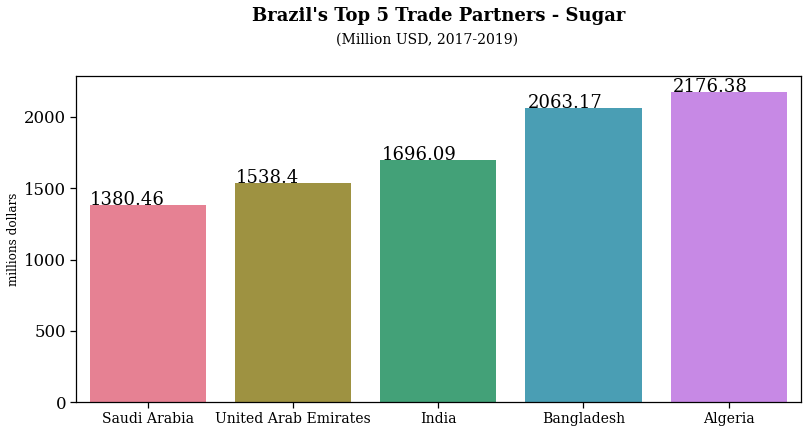

In [51]:
plt.figure(figsize=(13,6))
palette = sns.color_palette("husl", 5)

ax = sns.barplot(x='country', y='millions_usd', data=top5_sugar, order=top5_sugar.sort_values('millions_usd').country, palette=palette, )
for p in ax.patches:
   ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1))
    
plt.xlabel("", size=1)
plt.xticks(fontsize=14)
plt.ylabel("millions dollars", size=12)
plt.suptitle('(Million USD, 2017-2019)', size=14)
plt.title("Brazil's Top 5 Trade Partners - Sugar", size=18, fontdict=dict(weight='bold'), pad=55)

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
sns.axes_style("ticks")

plt.show()

In [52]:
partners_s = top5_sugar['country'].unique().tolist()
partners_s

['Algeria', 'Bangladesh', 'India', 'United Arab Emirates', 'Saudi Arabia']

In [53]:
top_partners_sugar = sugar_export_three_yrs.loc[sugar_export_three_yrs['country'].isin(partners_s)]
top_partners_sugar

,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
90877,2017-01-01,sugar,GO,Algeria,Export,Sea,16931.197,5686719.0,2017,1,16.931197,5.686719
90880,2017-01-01,sugar,GO,Bangladesh,Export,Sea,11537.892,3995514.0,2017,1,11.537892,3.995514
90897,2017-01-01,sugar,MG,Algeria,Export,Sea,21259.453,8580887.0,2017,1,21.259453,8.580887
90898,2017-01-01,sugar,MG,Bangladesh,Export,Sea,39283.054,15842609.0,2017,1,39.283054,15.842609
90902,2017-01-01,sugar,MG,India,Export,Sea,13500.000,5383800.0,2017,1,13.500000,5.383800
...,...,...,...,...,...,...,...,...,...,...,...,...
117781,2019-12-01,sugar,SP,Algeria,Export,Sea,250.452,68356.0,2019,12,0.250452,0.068356
117782,2019-12-01,sugar,SP,Algeria,Export,Sea,61479.762,16562098.0,2019,12,61.479762,16.562098
117795,2019-12-01,sugar,SP,Bangladesh,Export,Sea,83495.037,22795524.0,2019,12,83.495037,22.795524
117881,2019-12-01,sugar,SP,Saudi Arabia,Export,Sea,810.000,278778.0,2019,12,0.810000,0.278778


In [54]:
top_partners_sugar5 = top_partners_sugar.pivot_table(index = 'country',
                            columns = 'year',
                            values = 'usd',
                            aggfunc=np.sum).reset_index()

top_partners_sugar5['total_million_usd'] = top_partners_sugar5.sum(axis=1)
top_partners_sugar5.sort_values(by = ['total_million_usd'], ascending=False)

year,country,2017,2018,2019,total_million_usd
0,Algeria,8.768376e+08,675566247.0,623977094.0,2.176381e+09
1,Bangladesh,1.081573e+09,507918377.0,473683659.0,2.063175e+09
2,India,9.245464e+08,541286906.0,230261593.0,1.696095e+09
4,United Arab Emirates,8.707102e+08,481730915.0,185956762.0,1.538398e+09
3,Saudi Arabia,5.593944e+08,425445160.0,395616122.0,1.380456e+09


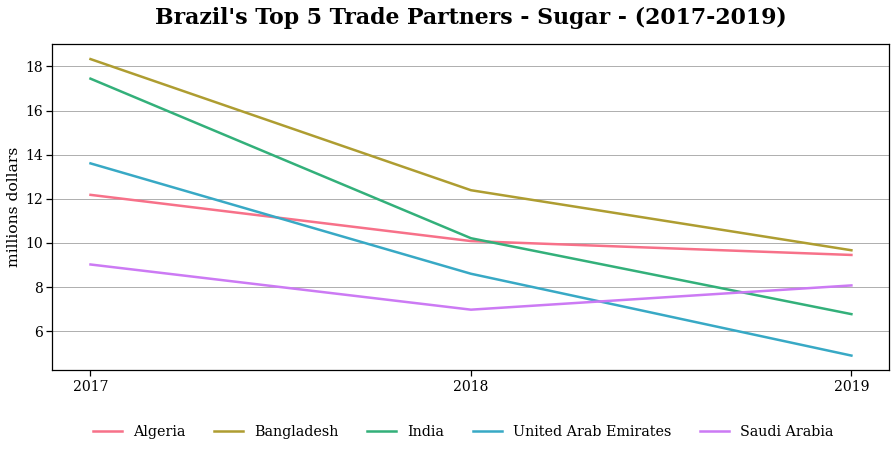

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("husl", 5)
sns.lineplot(top_partners_sugar['year'], top_partners_sugar['millions_usd'], hue= top_partners_sugar['country'],ci=None, palette=palette)

ax.set_title("Brazil's Top 5 Trade Partners - Sugar - (2017-2019)", fontsize = 22, fontdict=dict(weight='bold'), pad=20)
ax.set_ylabel('millions dollars')
ax.set_xlabel('')

plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xticks(top_partners_sugar['year'].unique())

plt.rcParams["font.family"] = "serif"

legend = ax.legend(loc='lower center', bbox_to_anchor=(0.45, -0.25), ncol=6, title=None)
legend.texts[0].set_text('')
legend.get_frame().set_linewidth(0.0)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.axes_style("ticks")
plt.grid(axis='y')

plt.show()

### 5. For each of the products in the dataset, show the 5 most important states in terms of exports?

In [56]:
df['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

In [57]:
products = df['product'].unique().tolist()
products

['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar', 'wheat']

Considering the last 3 years:

In [58]:
export = df.loc[(df['type']=='Export') & (df['year']==three_yrs_ago)]
export['product']=export['product'].str.replace('_', ' ')

export

<ipython-input-58-7b52dcc38b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export['product']=export['product'].str.replace('_', ' ')


,date,product,state,country,type,route,tons,usd,year,month,thousands_tons,millions_usd
90622,2017-01-01,corn,GO,Dominican Republic,Export,Sea,795.679,147710.0,2017,1,0.795679,0.147710
90623,2017-01-01,corn,GO,Ecuador,Export,Air,0.122,1504.0,2017,1,0.000122,0.001504
90624,2017-01-01,corn,GO,Egypt,Export,Sea,199.950,533884.0,2017,1,0.199950,0.533884
90625,2017-01-01,corn,GO,Iran,Export,Sea,17.680,2791.0,2017,1,0.017680,0.002791
90626,2017-01-01,corn,GO,Iran,Export,Sea,600.000,85626.0,2017,1,0.600000,0.085626
...,...,...,...,...,...,...,...,...,...,...,...,...
98160,2017-12-01,sugar,SP,Yemen,Export,Sea,6949.250,2654335.0,2017,12,6.949250,2.654335
98161,2017-12-01,sugar,SP,Yemen,Export,Sea,27012.250,9972911.0,2017,12,27.012250,9.972911
98177,2017-12-01,wheat,PR,United States,Export,Sea,0.600,840.0,2017,12,0.000600,0.000840
98178,2017-12-01,wheat,PR,United States,Export,Sea,4.000,5600.0,2017,12,0.004000,0.005600


In [59]:
products = export['product'].unique().tolist()
products

['corn', 'soybean meal', 'soybean oil', 'soybeans', 'sugar', 'wheat']

In [60]:
for i in products:
    product_i = export.loc[(export['product']==i)]
    important_states = product_i.groupby('state')['millions_usd'].sum().sort_values(ascending=False)[:5].reset_index()
    print('Product name: ' + i)
    print('-------------')
    print(important_states)
    print('-------------')


Product name: corn
-------------
  state  millions_usd
0    MT   2847.828009
1    GO    518.211783
2    PR    479.678610
3    MS    333.907294
4    SP    148.373621
-------------
Product name: soybean meal
-------------
  state  millions_usd
0    MT   1964.137328
1    PR   1081.919721
2    GO    713.896363
3    RS    635.656059
4    BA    298.254951
-------------
Product name: soybean oil
-------------
  state  millions_usd
0    PR    441.061742
1    RS    209.362795
2    MT    185.763603
3    GO    137.866298
4    SC     36.053320
-------------
Product name: soybeans
-------------
  state  millions_usd
0    MT   6807.824408
1    RS   4634.180970
2    PR   4138.938570
3    GO   1829.108419
4    MS   1364.383136
-------------
Product name: sugar
-------------
  state  millions_usd
0    SP   7488.698733
1    MG   1296.715238
2    PR   1060.429183
3    MS    502.751127
4    AL    444.531462
-------------
Product name: wheat
-------------
  state  millions_usd
0    RS    102.761458
1    PR

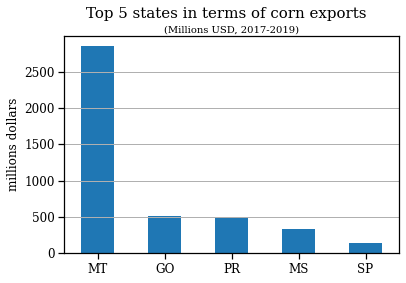

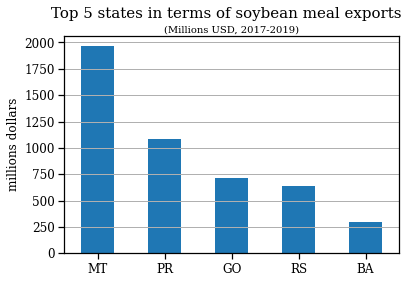

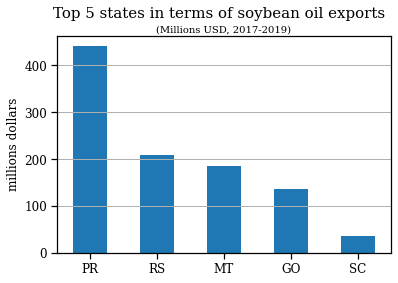

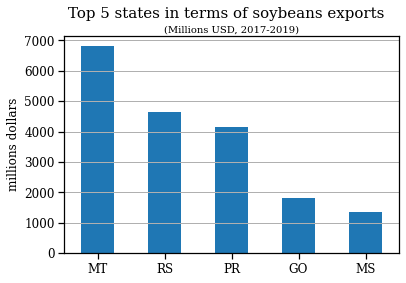

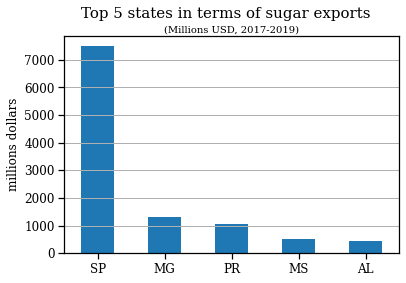

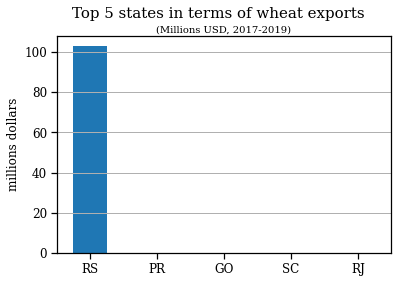

In [61]:
for i in products:
    product_i = export.loc[(export['product']==i)]
    
    important_states = product_i.groupby('state')['millions_usd'].sum().sort_values(ascending=False)[:5].reset_index()
    ax = important_states.plot(kind = 'bar', legend = None)
    
    label = important_states['state'].unique().tolist()
    r = range(len(label))
    plt.xticks(r, rotation = 0, labels=label, fontsize = 12)
    
    ax.set_ylabel('millions dollars', fontsize = 12)
    plt.tick_params(axis='y', which='major', labelsize=12)
    
    plt.grid(axis='y')

    plt.suptitle('Top 5 states in terms of '+i+' exports', fontsize = 15)
    plt.title('(Millions USD, 2017-2019)', fontsize = 10, pad=3)
    



### Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [62]:
df2 = pd.read_excel('covariates.xlsx')

In [63]:
#df2.fillna(0)

#### Soybeans

In [64]:
soybeans = df.loc[(df['product'] == 'soybeans') & (df['type']=='Export')]
soybeans = soybeans[['thousands_tons', 'year']]
soybeans_ = soybeans.groupby('year')['thousands_tons'].sum().reset_index()
soybeans_['year']=pd.to_datetime(soybeans_['year'], format='%Y')
soybeans_.set_index('year', inplace=True)
ts_soybeans = soybeans_
ts_soybeans

,thousands_tons
year,
1997-01-01,8195.025114
1998-01-01,8679.492322
1999-01-01,8096.035096
2000-01-01,10725.123670
2001-01-01,14486.901883
2002-01-01,14806.489780
2003-01-01,18391.117271
2004-01-01,17186.093130
2005-01-01,22063.406125


Text(0.5, 1.0, 'Soybeans')

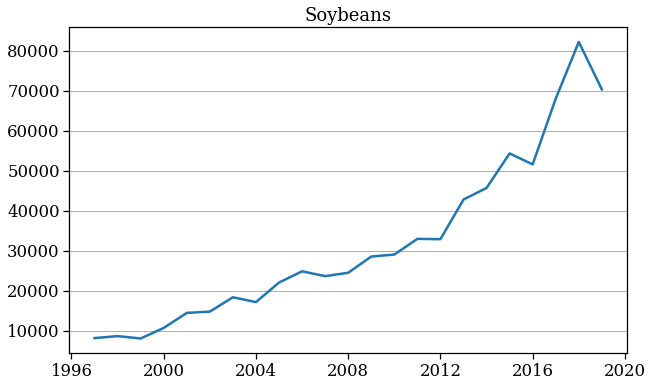

In [65]:
plt.figure(figsize=(10,6))
plt.plot(ts_soybeans)
plt.grid(axis='y')
plt.title('Soybeans')

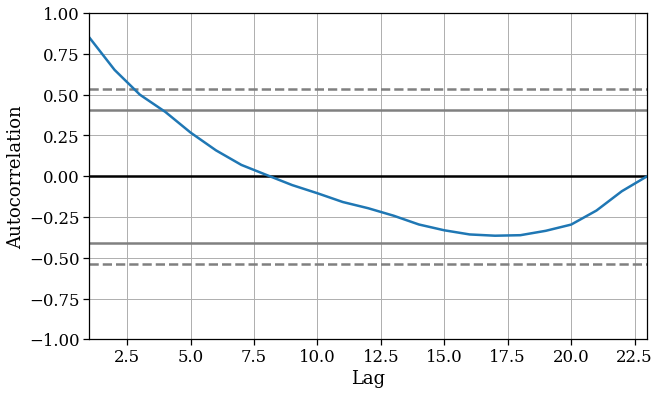

In [66]:
plt.figure(figsize=(10,6))
autocorrelation_plot(ts_soybeans)

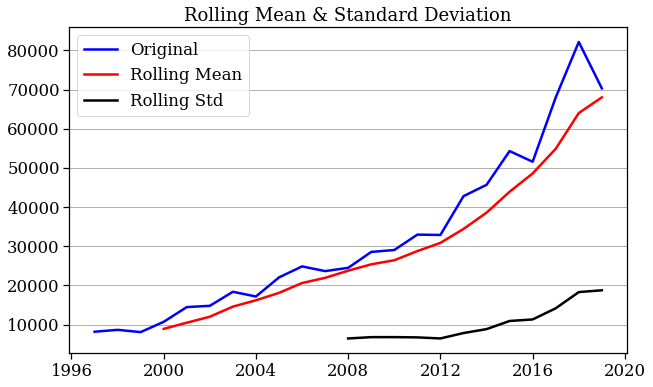

In [67]:
rolmean = pd.Series(ts_soybeans['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_soybeans['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_soybeans, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
    

Text(0.5, 1.0, 'soybeans')

<Figure size 936x432 with 0 Axes>

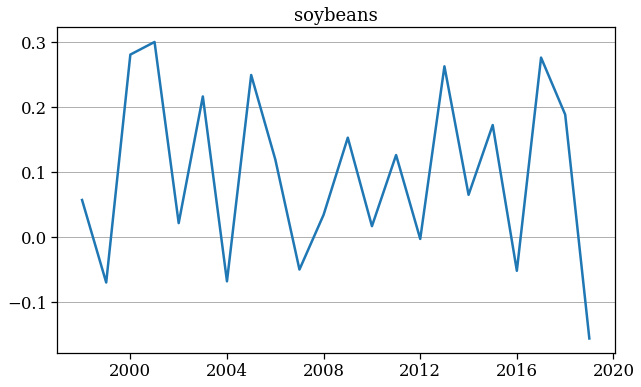

In [68]:
#Making the TS Stationary - Differencing technique

ts_soybeans_log = np.log(ts_soybeans)
ts_soybeans_log_diff_shifting = ts_soybeans_log - ts_soybeans_log.shift()
ts_soybeans_log_diff_shifting.dropna(inplace=True)

plt.figure(figsize=(13,6))
plt.figure(figsize=(10,6))
plt.plot(ts_soybeans_log_diff_shifting)
plt.grid(axis='y')
plt.title('soybeans')

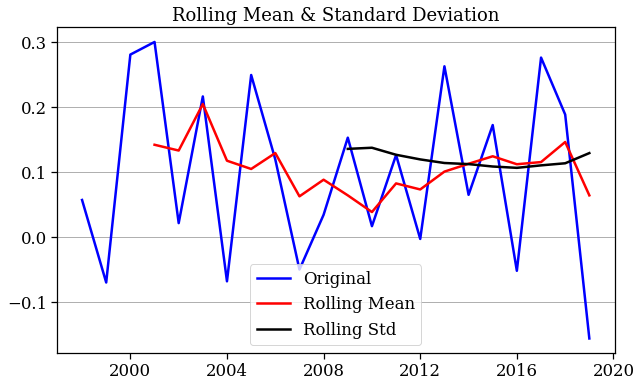

In [69]:
rolmean = pd.Series(ts_soybeans_log_diff_shifting['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_soybeans_log_diff_shifting['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_soybeans_log_diff_shifting, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


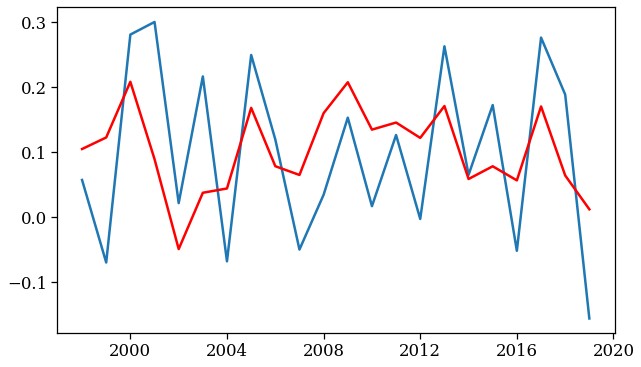

In [70]:
# Autoregressive Integrated Moving Average Model - ARIMA
model = ARIMA(ts_soybeans_log, order=(3, 1, 0))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(10,6))
plt.plot(ts_soybeans_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_soybeans_log_diff_shifting)**2))

In [71]:
#Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_soybeans_log['thousands_tons'], index=ts_soybeans_log['thousands_tons'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(ts_soybeans_log_diff_shifting['thousands_tons'],fill_value=0)

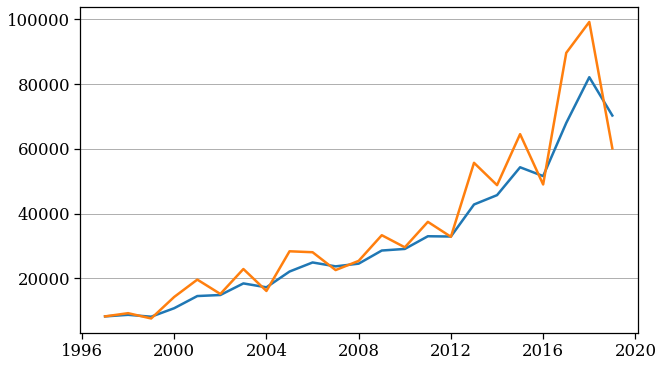

In [72]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(10,6))
plt.plot(ts_soybeans)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_soybeans)**2)/len(ts_soybeans)))
plt.grid(axis='y')

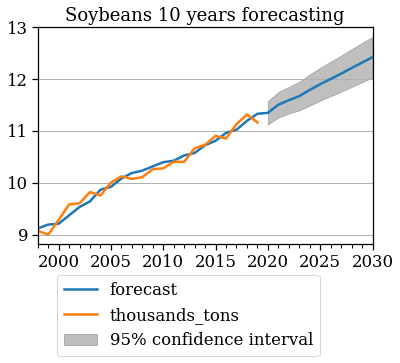

In [73]:
# Forecasting
ax = results_ARIMA.plot_predict(1,33)
x=results_ARIMA.forecast(steps=120)
plt.title('Soybeans 10 years forecasting')
plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.55))
plt.grid(axis='y')

#### Soybean Meal

In [74]:
soybean_meal = df.loc[(df['product'] == 'soybean_meal') & (df['type']=='Export')]
soybean_meal = soybean_meal[['thousands_tons', 'year']]
soybean_meal_ = soybean_meal.groupby('year')['thousands_tons'].sum().reset_index()
soybean_meal_['year']=pd.to_datetime(soybean_meal_['year'], format='%Y')
soybean_meal_.set_index('year', inplace=True)
ts_soybean_meal = soybean_meal_
ts_soybean_meal

,thousands_tons
year,
1997-01-01,9965.945186
1998-01-01,9947.875071
1999-01-01,10050.065971
2000-01-01,9055.434864
2001-01-01,10582.493230
2002-01-01,11866.231586
2003-01-01,13013.401300
2004-01-01,13708.360587
2005-01-01,14328.459937


Text(0.5, 1.0, 'Soybean Meal')

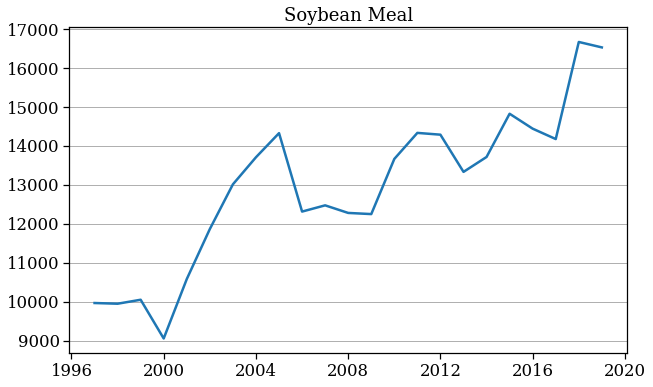

In [75]:
plt.figure(figsize=(10,6))
plt.plot(ts_soybean_meal)
plt.grid(axis='y')
plt.title('Soybean Meal')

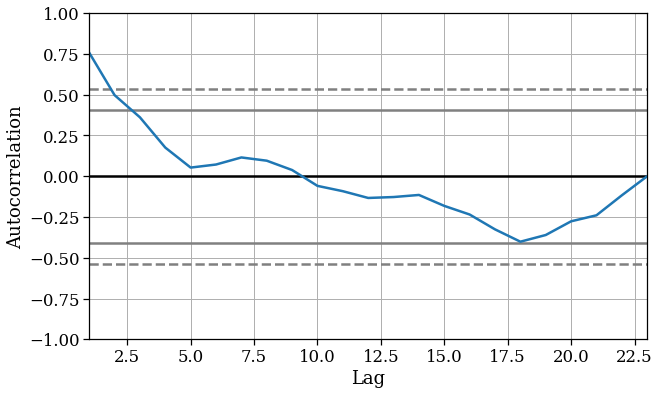

In [76]:
plt.figure(figsize=(10,6))
autocorrelation_plot(ts_soybean_meal)

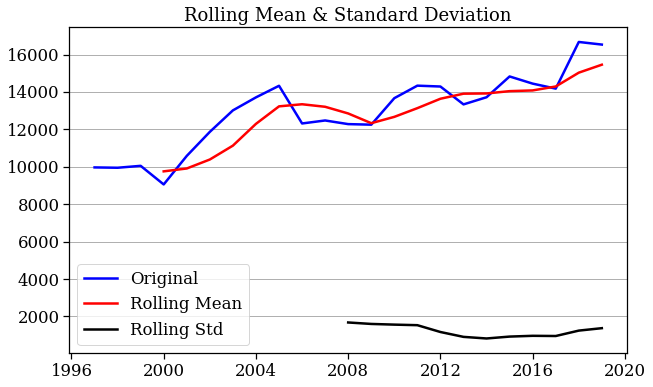

In [77]:
rolmean = pd.Series(ts_soybean_meal['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_soybean_meal['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_soybean_meal, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Text(0.5, 1.0, 'soybean meal')

<Figure size 936x432 with 0 Axes>

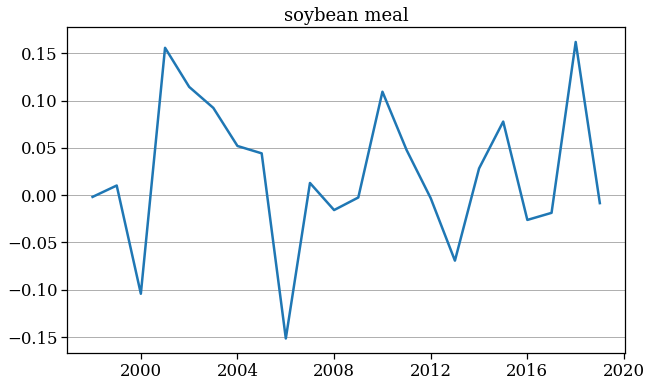

In [78]:
#Making the TS Stationary - Differencing technique

ts_soybean_meal_log = np.log(ts_soybean_meal)
ts_soybean_meal_log_diff_shifting = ts_soybean_meal_log - ts_soybean_meal_log.shift()
ts_soybean_meal_log_diff_shifting.dropna(inplace=True)

plt.figure(figsize=(13,6))
plt.figure(figsize=(10,6))
plt.plot(ts_soybean_meal_log_diff_shifting)
plt.grid(axis='y')
plt.title('soybean meal')

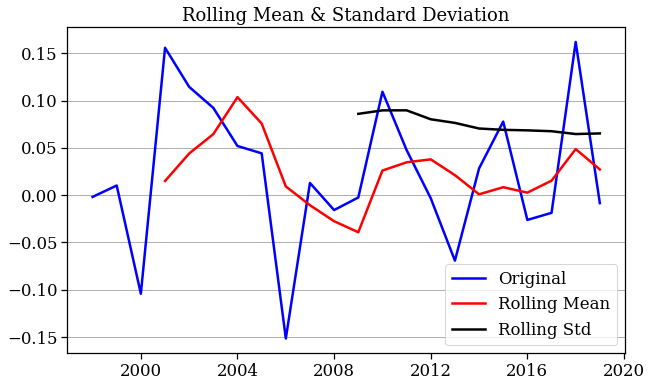

In [79]:
rolmean = pd.Series(ts_soybean_meal_log_diff_shifting['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_soybean_meal_log_diff_shifting['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_soybean_meal_log_diff_shifting, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


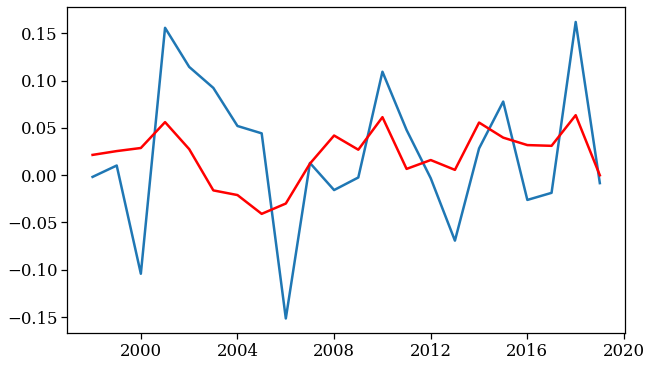

In [80]:
# Autoregressive Integrated Moving Average Model - ARIMA
model = ARIMA(ts_soybean_meal_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(10,6))
plt.plot(ts_soybean_meal_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_soybeans_log_diff_shifting)**2))

In [81]:
#Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_soybean_meal_log['thousands_tons'], index=ts_soybean_meal_log['thousands_tons'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(ts_soybean_meal_log_diff_shifting['thousands_tons'],fill_value=0)

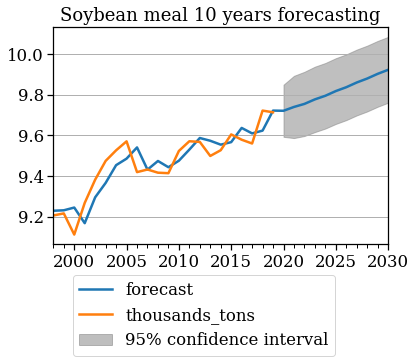

In [82]:
# Forecasting
ax = results_ARIMA.plot_predict(1,33)
x=results_ARIMA.forecast(steps=120)
plt.title('Soybean meal 10 years forecasting')
plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.55))
plt.grid(axis='y')

#### Corn

In [83]:
corn = df.loc[(df['product'] == 'corn') & (df['type']=='Export')]
corn = corn[['thousands_tons', 'year']]
corn_ = corn.groupby('year')['thousands_tons'].sum().reset_index()
corn_['year']=pd.to_datetime(corn_['year'], format='%Y')
corn_.set_index('year', inplace=True)
ts_corn = corn_
ts_corn

,thousands_tons
year,
1997-01-01,356.895029
1998-01-01,6.033643
1999-01-01,5.321076
2000-01-01,5.554756
2001-01-01,5410.198846
2002-01-01,2727.390128
2003-01-01,3509.735479
2004-01-01,4892.188461
2005-01-01,1069.451576


Text(0.5, 1.0, 'Corn')

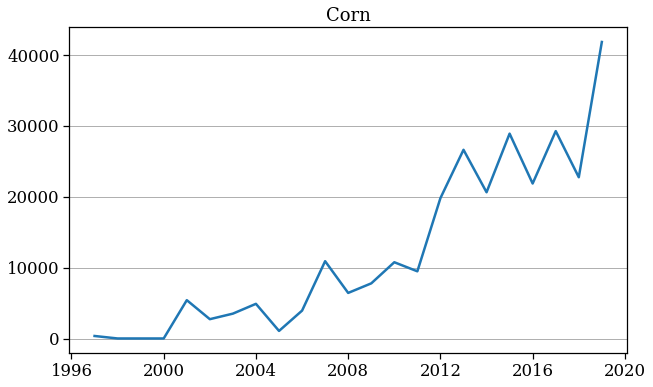

In [84]:
plt.figure(figsize=(10,6))
plt.plot(ts_corn)
plt.grid(axis='y')
plt.title('Corn')

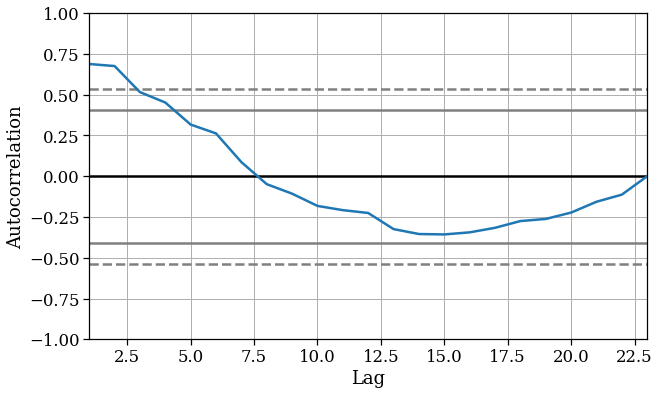

In [85]:
plt.figure(figsize=(10,6))
autocorrelation_plot(ts_corn)

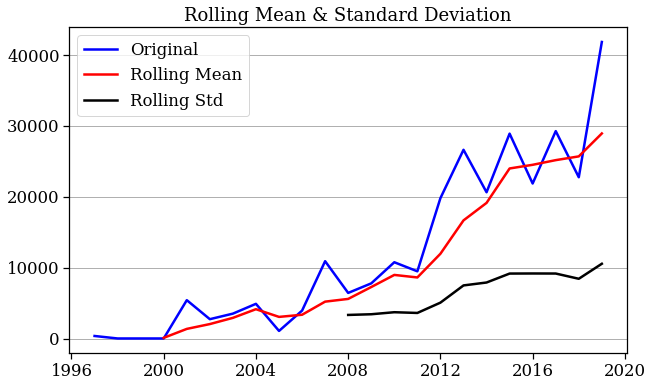

In [86]:
rolmean = pd.Series(ts_corn['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_corn['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_corn, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Text(0.5, 1.0, 'corn')

<Figure size 936x432 with 0 Axes>

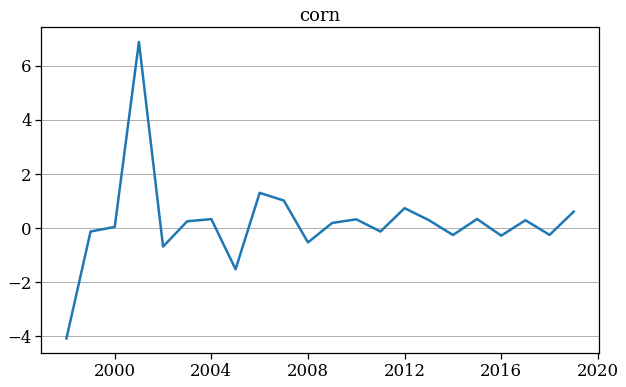

In [87]:
#Making the TS Stationary - Differencing technique

ts_corn_log = np.log(ts_corn)
ts_corn_log_diff_shifting = ts_corn_log - ts_corn_log.shift()
ts_corn_log_diff_shifting.dropna(inplace=True)

plt.figure(figsize=(13,6))
plt.figure(figsize=(10,6))
plt.plot(ts_corn_log_diff_shifting)
plt.grid(axis='y')
plt.title('corn')

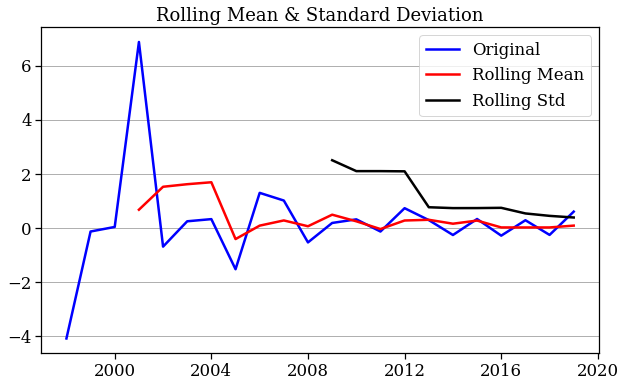

In [88]:
rolmean = pd.Series(ts_corn_log_diff_shifting['thousands_tons']).rolling(window=4).mean()
rolstd = pd.Series(ts_corn_log_diff_shifting['thousands_tons']).rolling(window=12).std()
    
#Plot rolling statistics:
plt.figure(figsize=(10,6))
plt.plot(ts_corn_log_diff_shifting, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Cliente\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


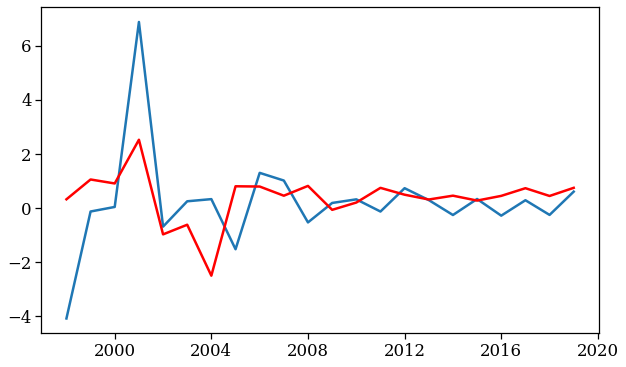

In [89]:
# Autoregressive Integrated Moving Average Model - ARIMA
model = ARIMA(ts_corn_log, order=(3, 1, 0))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(10,6))
plt.plot(ts_corn_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_soybeans_log_diff_shifting)**2))

In [90]:
#Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_corn_log['thousands_tons'], index=ts_corn_log['thousands_tons'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(ts_corn_log_diff_shifting['thousands_tons'],fill_value=0)

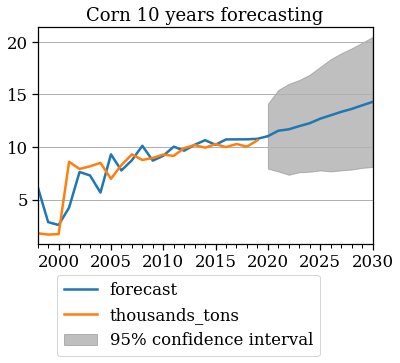

In [91]:
# Forecasting
ax = results_ARIMA.plot_predict(1,33)
x=results_ARIMA.forecast(steps=120)
plt.title('Corn 10 years forecasting')
plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.55))
plt.grid(axis='y')